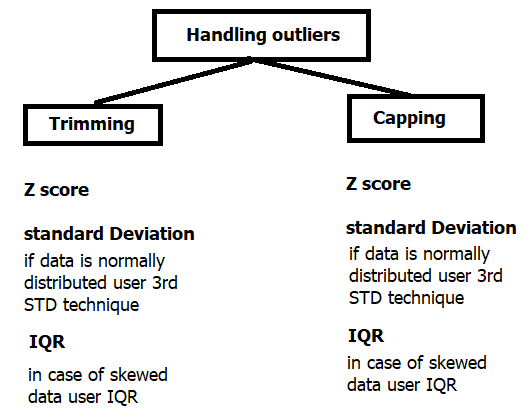

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sc


In [ ]:
# create  Data
l = [11,10,12,14,12,15,14,15,13,102,12,14,17,19,107,10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

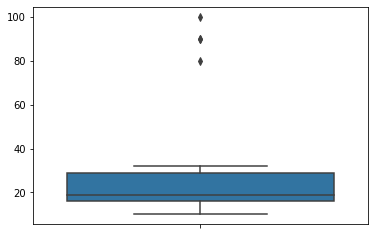

In [ ]:
sns.boxplot(y=l)

In [ ]:
# Using Z score

def find_outliers(data):
    outliers = []
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z_score = (i- mean )/std
        if np.abs(z_score) > threshold:
            outliers.append(i)

    return outliers
    

In [ ]:
# calling z score function for outlier detection
find_outliers(l)

[102, 107, 108]

In [ ]:
# Using IQR ( this technique is usefull with skeweed data )
# Function to see the outliers from diven data
def iqr_outlier(l):
    outlier = []
    l = sorted(l)
    q1,q3 = np.percentile(l,[25,75])
    iqr = q3-q1
    lower_fence = q1-(1.5*iqr)
    upper_fence = q1+(1.5*iqr)

    for i in l:
        if (i > upper_fence) | (i < lower_fence):
            outlier.append(i)
    return outlier


In [ ]:
iqr_outlier(l)

[17, 19, 102, 107, 108]

In [ ]:
df= pd.read_csv('/content/pima-diabetic.csv')
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [ ]:
df['diabetes'] = df['diabetes'].map({True:1,False:0})

In [ ]:
df.describe()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,1.048295,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.379471,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.275800,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.809136,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.906200,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.260800,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,3.900600,1.000000


In [ ]:
df['bmi'] = df['bmi'].replace(0,df['bmi'].mean())
df['glucose_conc'] = df['glucose_conc'].replace(0,df['glucose_conc'].mean())
df['diastolic_bp'] = df['diastolic_bp'].replace(0,df['diastolic_bp'].mean())
df['thickness'] = df['thickness'].replace(0,df['thickness'].mean())
df['insulin'] = df['insulin'].replace(0,df['insulin'].mean())
df['skin'] = df['skin'].replace(0,df['skin'].mean())

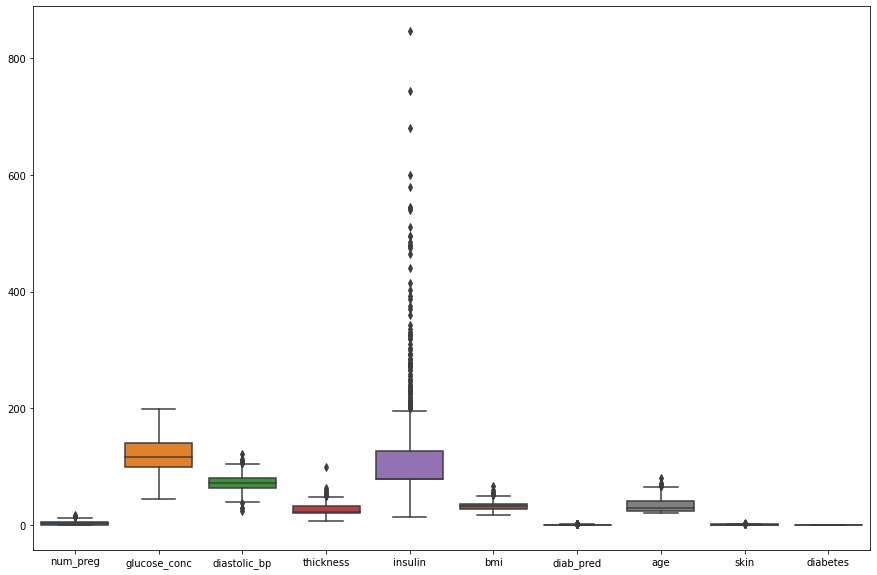

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data = df)

In [ ]:
def diagnostic_plot(df,column):
    plt.figure(figsize=(16,4))

    plt.subplot(1,2,1)
    sns.distplot(df[column],bins=30)
    plt.title('Histogram')

    plt.subplot(1,2,2)
    sns.boxplot(df[column])
    plt.title('boxplot')

    plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


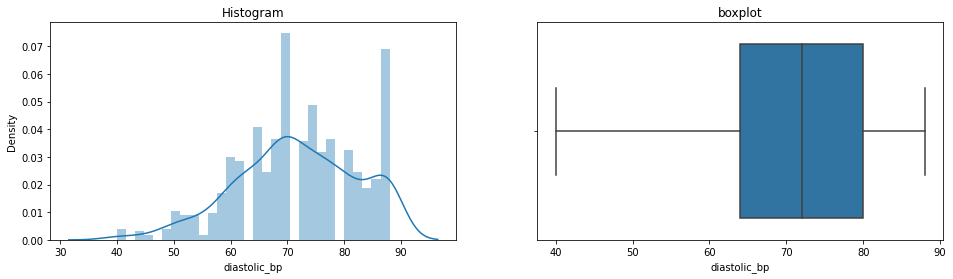

In [ ]:
diagnostic_plot(df,'diastolic_bp')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


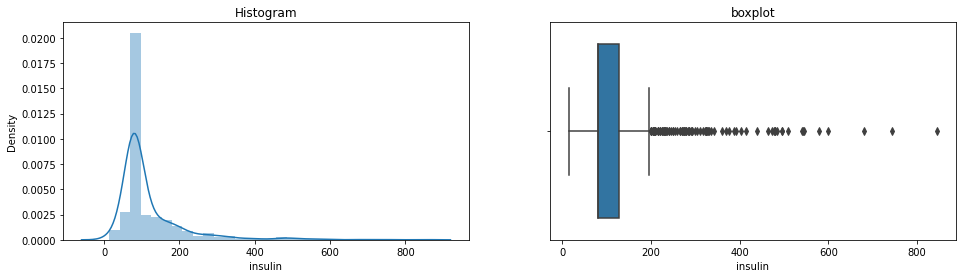

In [ ]:
diagnostic_plot(df,'insulin')

**Outlier Capping with IQR**

In [ ]:
# Function to find lower and upper limit of an skewed outlier feature
def find_outliers(df,column,distance):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)

    iqr = q3-q1
    lower_bowndary = q1 - (iqr*distance)
    upper_bowndary = q1 + (iqr*distance)

    return lower_bowndary,upper_bowndary

In [ ]:
# find limits for Insulin column
lower_limit, upper_limit =find_outliers(df,'insulin',1.5)
lower_limit, upper_limit
# for extreme region take distance = 3

(8.623697916666671, 150.97526041666669)

In [ ]:
# find limits for diastolic_bp column
lower_limit, upper_limit =find_skewed(df,'diastolic_bp',1.5)
lower_limit, upper_limit

In [ ]:
df.columns

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'skin', 'diabetes'],
      dtype='object')

**Capping Outlier**

Below funtion will remove outlier for entire Data Frame

In [ ]:
# capping  outlier for entire df in single shot
columns = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'skin']
for i in columns:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)

    iqr = q3-q1
    lower_bowndary = q1 - (iqr * 1.5)
    upper_bowndary = q1 + (iqr * 1.5)
    df[i] = np.where(df[i] > upper_bowndary,upper_bowndary, df[i] )
    df[i] = np.where(df[i] < lower_bowndary,lower_bowndary, df[i] )




In [ ]:
# df.loc[df['Age'] >= 70,'Age'] = 70

# Trimming the outliers

First Get the boundaries value

In [ ]:
def trim_outlier(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.25)
    IQR = q3 - q1
    upper_boundaries = q3 + ( IQR *1.5)
    lower_boundaries = q1 - ( IQR *1.5)

    ls = df.index[ (df[col] < lower_boundaries) | (df[col] > upper_boundaries) ]
    return ls

create an empty list to store all the outlier indexex

In [ ]:
# Store all the index value in index list
index_list = []

for feature in ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin','bmi', 'diab_pred', 'age', 'skin']:
    index_list.extend(trim_outlier(df,feature))

In [ ]:
trim_outlier(df,'glucose_conc')

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            758, 759, 760, 761, 762, 763, 764, 765, 766, 767],
           dtype='int64', length=751)

In [ ]:
print(len(set(index_list)))

768


Now drop all the rows from data Frame

In [ ]:
df.drop(set(index_list))

In [ ]:
df.shape

(768, 10)

In [ ]:

def iqr_outlier(df,features):
    q1 = df[features].quantile(0.25)
    q3 = df[features].quantile(0.75)
    iqr = q3-q1
    lower_fence = q1-(1.5*iqr)
    upper_fence = q1+(1.5*iqr)
    ls = df.index[(df[features] < lower_fence) | (df[features] > upper_fence)]
    return ls 

In [ ]:
v = []
for i in ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin','bmi', 'diab_pred', 'age', 'skin']:
    c = iqr_outlier(df,'insulin')
    for i in c:
        v.append(i)


In [ ]:
zz = sorted(set(v))
len(zz)

447

In [ ]:
df = df.drop(zz)

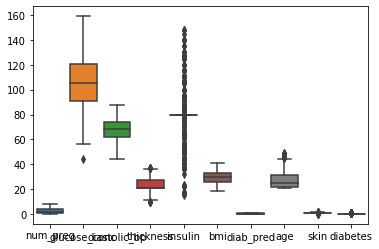

In [ ]:
sns.boxplot(data=df)

# Diabetec Data set

In [201]:
df = pd.read_csv('/content/diabetes.csv')

In [168]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [185]:
df.shape

(768, 9)

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [186]:
# There are lot of 0 value theat need to be imputed.
df['Pregnancies'] = df['Pregnancies'].replace(0,df['Pregnancies'].mean())
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())


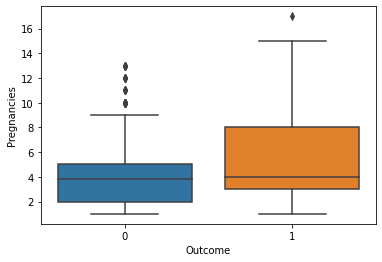

In [14]:
sns.boxplot(y='Pregnancies',x='Outcome',data=df)

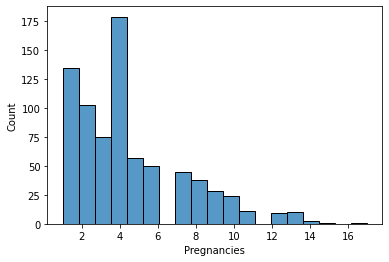

In [15]:
sns.histplot(df['Pregnancies'])

In [28]:
# Dividing dataset into Independent and Dependent columns
x = df.drop(columns='Outcome',axis=1)
y=df['Outcome']

In [187]:
# changing name of columns to small
df.columns = df.columns.str.lower()

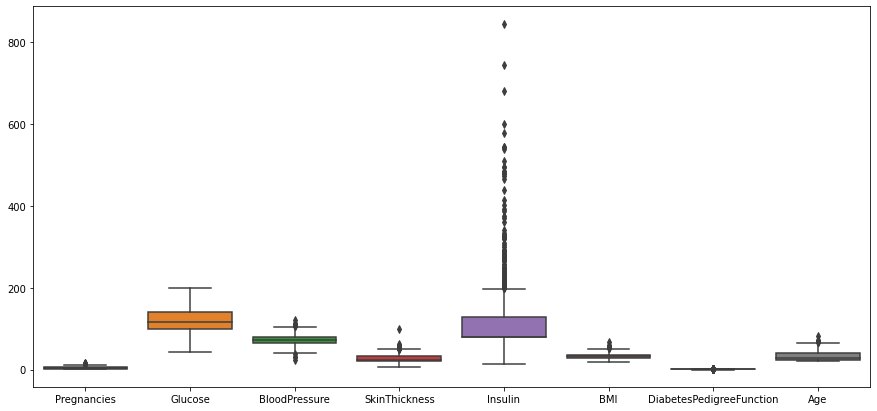

In [37]:
plt.figure(figsize=(15,7))
sns.boxplot(data=x)

In [196]:

def get_outlier_index(df,col,distance):
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3-q1

        lower_bound = q1 - (iqr*distance)
        upper_bound = q3 + (iqr*distance)
        
    
        return df.index[(df[col] < lower_bound) | (df[col] > upper_bound)]


In [197]:
get_outlier_index(df,'glucose',1.5)

Int64Index([2, 317, 604], dtype='int64')

In [202]:

df_trim,df2 = df.copy()
print(df_trim.shape,df.shape)

(768, 9) (768, 9)


In [204]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

In [205]:
# Function to trim outliers using numpy array
def iqr_trimming(df, cols, factor):
    
    drop_outliers = np.array([])
    
    for col in cols:
        
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        iqr = q3 - q1
        
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
        
        s = df[col]
        
        indexes = s[(s > upper_whisker) | (s< lower_whisker)].index
        
        drop_outliers = np.append(drop_outliers, indexes)
    
    return drop_outliers

In [206]:
dropped = np.unique(iqr_trimming(df_trim, features, 1.5))

In [207]:
len(dropped)

129

In [208]:
df_trim.drop(dropped, inplace=True)

In [209]:
print(df_trim.shape,df.shape)

(639, 9) (768, 9)


In [232]:
# Function to trim outliers using list

def iqr_trimming3(df, cols, factor):
     l1 = []
     for col in cols:
        
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
       
        l1.extend(df.index[(df[col] > upper_whisker) | (df[col] < lower_whisker)])
    
     return l1

In [225]:
df2 = df.copy()

In [ ]:
dropped = iqr_trimming3(df2, features, 1.5)

In [234]:
len(dropped)

146

In [244]:
goingtodrop = list(set(dropped))

In [245]:
len(goingtodrop)

129

In [246]:
df2.drop(goingtodrop, inplace=True)

In [247]:
print(df.shape,df2.shape)

(768, 9) (639, 9)
